In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np

In [2]:
tracks = pd.read_csv('datasets/fma-rock-vs-hiphop.csv')
echonest_metrics = pd.read_json('datasets/echonest-metrics.json', precise_float=True)

In [3]:
# Merge the relevant columns of tracks and echonest_metrics
echo_tracks = pd.merge(echonest_metrics, tracks[['track_id', 'genre_top']], how='inner', on='track_id')

echo_tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4802 entries, 0 to 4801
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          4802 non-null   int64  
 1   acousticness      4802 non-null   float64
 2   danceability      4802 non-null   float64
 3   energy            4802 non-null   float64
 4   instrumentalness  4802 non-null   float64
 5   liveness          4802 non-null   float64
 6   speechiness       4802 non-null   float64
 7   tempo             4802 non-null   float64
 8   valence           4802 non-null   float64
 9   genre_top         4802 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 375.3+ KB


In [10]:
corr_metrics = echo_tracks.select_dtypes(include='number').corr()
corr_metrics.style.background_gradient()

features = echo_tracks.drop(['track_id', 'genre_top'], axis=1)
labels = echo_tracks['genre_top']

scaler = StandardScaler()
scaled_train_features = scaler.fit_transform(features)

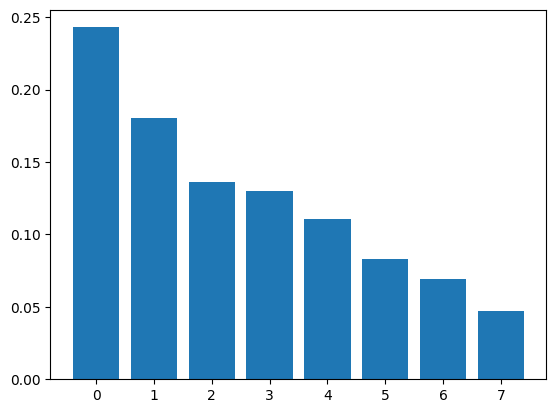

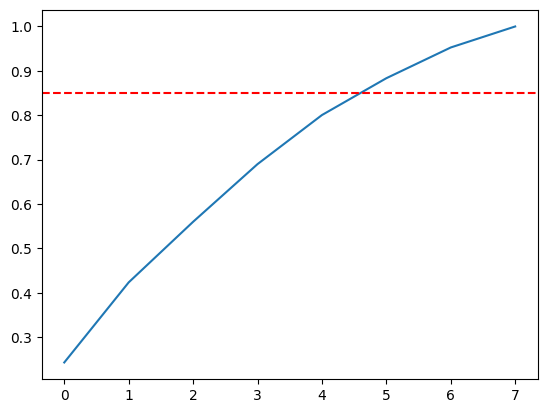

In [7]:
# Apply PCA
pca = PCA()
pca.fit(scaled_train_features)

exp_variance = pca.explained_variance_ratio_

fig, ax = plt.subplots()
ax.bar(range(pca.n_components_), exp_variance)
plt.show()

cum_exp_variance = np.cumsum(exp_variance)

fig, ax = plt.subplots()
ax.plot(cum_exp_variance)
ax.axhline(y=0.85, linestyle='--', color='r')
plt.show()

n_components = 6

pca = PCA(n_components=n_components, random_state=10)
pca_projection = pca.fit_transform(scaled_train_features)

In [8]:
train_features, test_features, train_labels, test_labels = train_test_split(pca_projection, labels, random_state=10)

# Decision Tree model
tree = DecisionTreeClassifier(random_state=10)
tree.fit(train_features, train_labels)
pred_labels_tree = tree.predict(test_features)

# Logistic Regression model
logreg = LogisticRegression(random_state=10)
logreg.fit(train_features, train_labels)
pred_labels_logit = logreg.predict(test_features)

class_rep_tree = classification_report(test_labels, pred_labels_tree)
class_rep_log = classification_report(test_labels, pred_labels_logit)

print("Decision Tree: \n", class_rep_tree)
print("Logistic Regression: \n", class_rep_log)

Decision Tree: 
               precision    recall  f1-score   support

     Hip-Hop       0.60      0.60      0.60       235
        Rock       0.90      0.90      0.90       966

    accuracy                           0.84      1201
   macro avg       0.75      0.75      0.75      1201
weighted avg       0.84      0.84      0.84      1201

Logistic Regression: 
               precision    recall  f1-score   support

     Hip-Hop       0.77      0.54      0.64       235
        Rock       0.90      0.96      0.93       966

    accuracy                           0.88      1201
   macro avg       0.83      0.75      0.78      1201
weighted avg       0.87      0.88      0.87      1201



In [9]:
# Cross-validation with KFold
kf = KFold(n_splits=10)

# Decision Tree cross-validation
tree_score = cross_val_score(tree, pca_projection, labels, cv=kf)
print("Decision Tree:", tree_score)

# Logistic Regression cross-validation
logit_score = cross_val_score(logreg, pca_projection, labels, cv=kf)
print("Logistic Regression:", logit_score)

Decision Tree: [0.9022869  0.88773389 0.8875     0.77708333 0.8125     0.84791667
 0.86041667 0.8625     0.84375    0.85625   ]
Logistic Regression: [0.94802495 0.95218295 0.90833333 0.73541667 0.81041667 0.85833333
 0.85416667 0.86666667 0.89166667 0.8375    ]
